In [1]:
import os
os.chdir('../../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', font_scale=1.15, style='whitegrid')

### Trading Hub Europe

In [2]:
the_consumption = pd.read_csv(
    'data/raw/Trading Hub Europe  Publications  Transparency  Aggregated consumption data.csv',
    sep=';',
    thousands=',',
    index_col='Gasday'
    )

the_consumption.index = pd.to_datetime(the_consumption.index, format='%d/%m/%Y')

# Convert kWh to MWh and aggregate different measurement types
the_consumption = the_consumption.select_dtypes('number') / 1000
the_consumption_aggregated = the_consumption.sum(axis='columns')

the_consumption_aggregated.sample(n=5).sort_index()

Gasday
2022-02-12    3810438.937
2022-04-12    2627507.509
2022-05-06    1956046.730
2023-02-23    2993149.865
2023-02-26    3531286.358
dtype: float64

### GASPOOL market area

In [3]:
gaspool_consumption = pd.read_csv(
    'data/raw/GASPOOL natural gas consumption.csv',
    sep=';',
    index_col='Datum'
)

gaspool_consumption.index = pd.to_datetime(gaspool_consumption.index, format='%d.%m.%Y')
gaspool_consumption_aggregated = gaspool_consumption.sum(axis='columns')

gaspool_consumption_aggregated.sample(n=5).sort_index()

Datum
2017-03-31     930328
2018-06-16     675170
2018-06-25     855614
2019-03-13    1632354
2019-05-30     831234
dtype: int64

### NetConnect Germany market area

In [4]:
ncg_consumption = pd.read_csv(
    'data/raw/NetConnect Germany natural gas consumption.csv',
    sep=';',
    index_col='DayOfUse'
)

ncg_consumption.index = pd.to_datetime(ncg_consumption.index, format='%d.%m.%Y')

# Convert kWh to MWh and aggregate different measurement types
ncg_consumption = ncg_consumption.select_dtypes('number') / 1000
ncg_consumption_aggregated = ncg_consumption.sum(axis='columns')

ncg_consumption_aggregated.sample(n=5).sort_index()

DayOfUse
2014-04-25     896162.437
2015-05-14     788410.271
2017-06-12     782544.059
2018-01-27    1733617.853
2020-09-03     949624.178
dtype: float64

In [5]:
# Sum former market areas
gaspool_ncg_combined = gaspool_consumption_aggregated + ncg_consumption_aggregated
gaspool_ncg_combined.sample(n=5).sort_index()

2013-03-23            NaN
2014-11-20            NaN
2019-06-21    1546515.722
2020-11-20    3741058.946
2021-09-17    1722041.896
dtype: float64

In [6]:
consumption_data = pd.concat([the_consumption_aggregated, gaspool_ncg_combined])

Text(0.5, 0, 'Date')

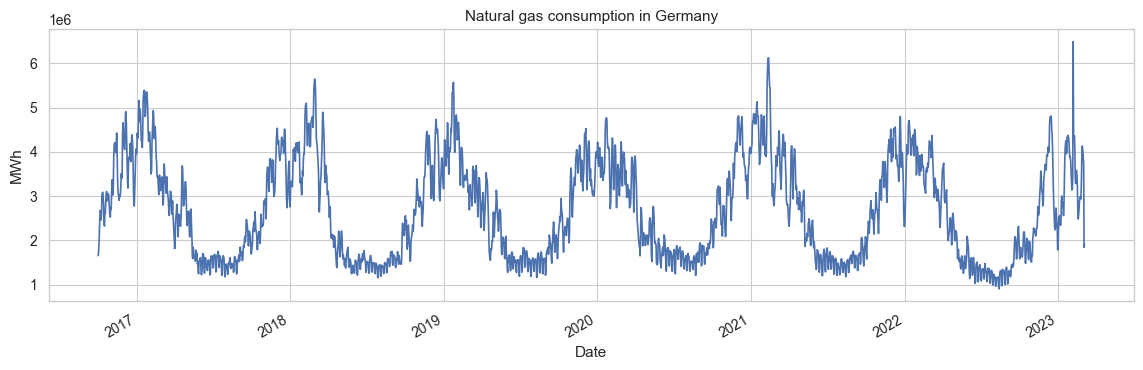

In [7]:
fig, ax = plt.subplots(figsize=(14, 4))
consumption_data.plot(ax=ax)
ax.set_title('Natural gas consumption in Germany')
ax.set_ylabel('MWh')
ax.set_xlabel('Date')